In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


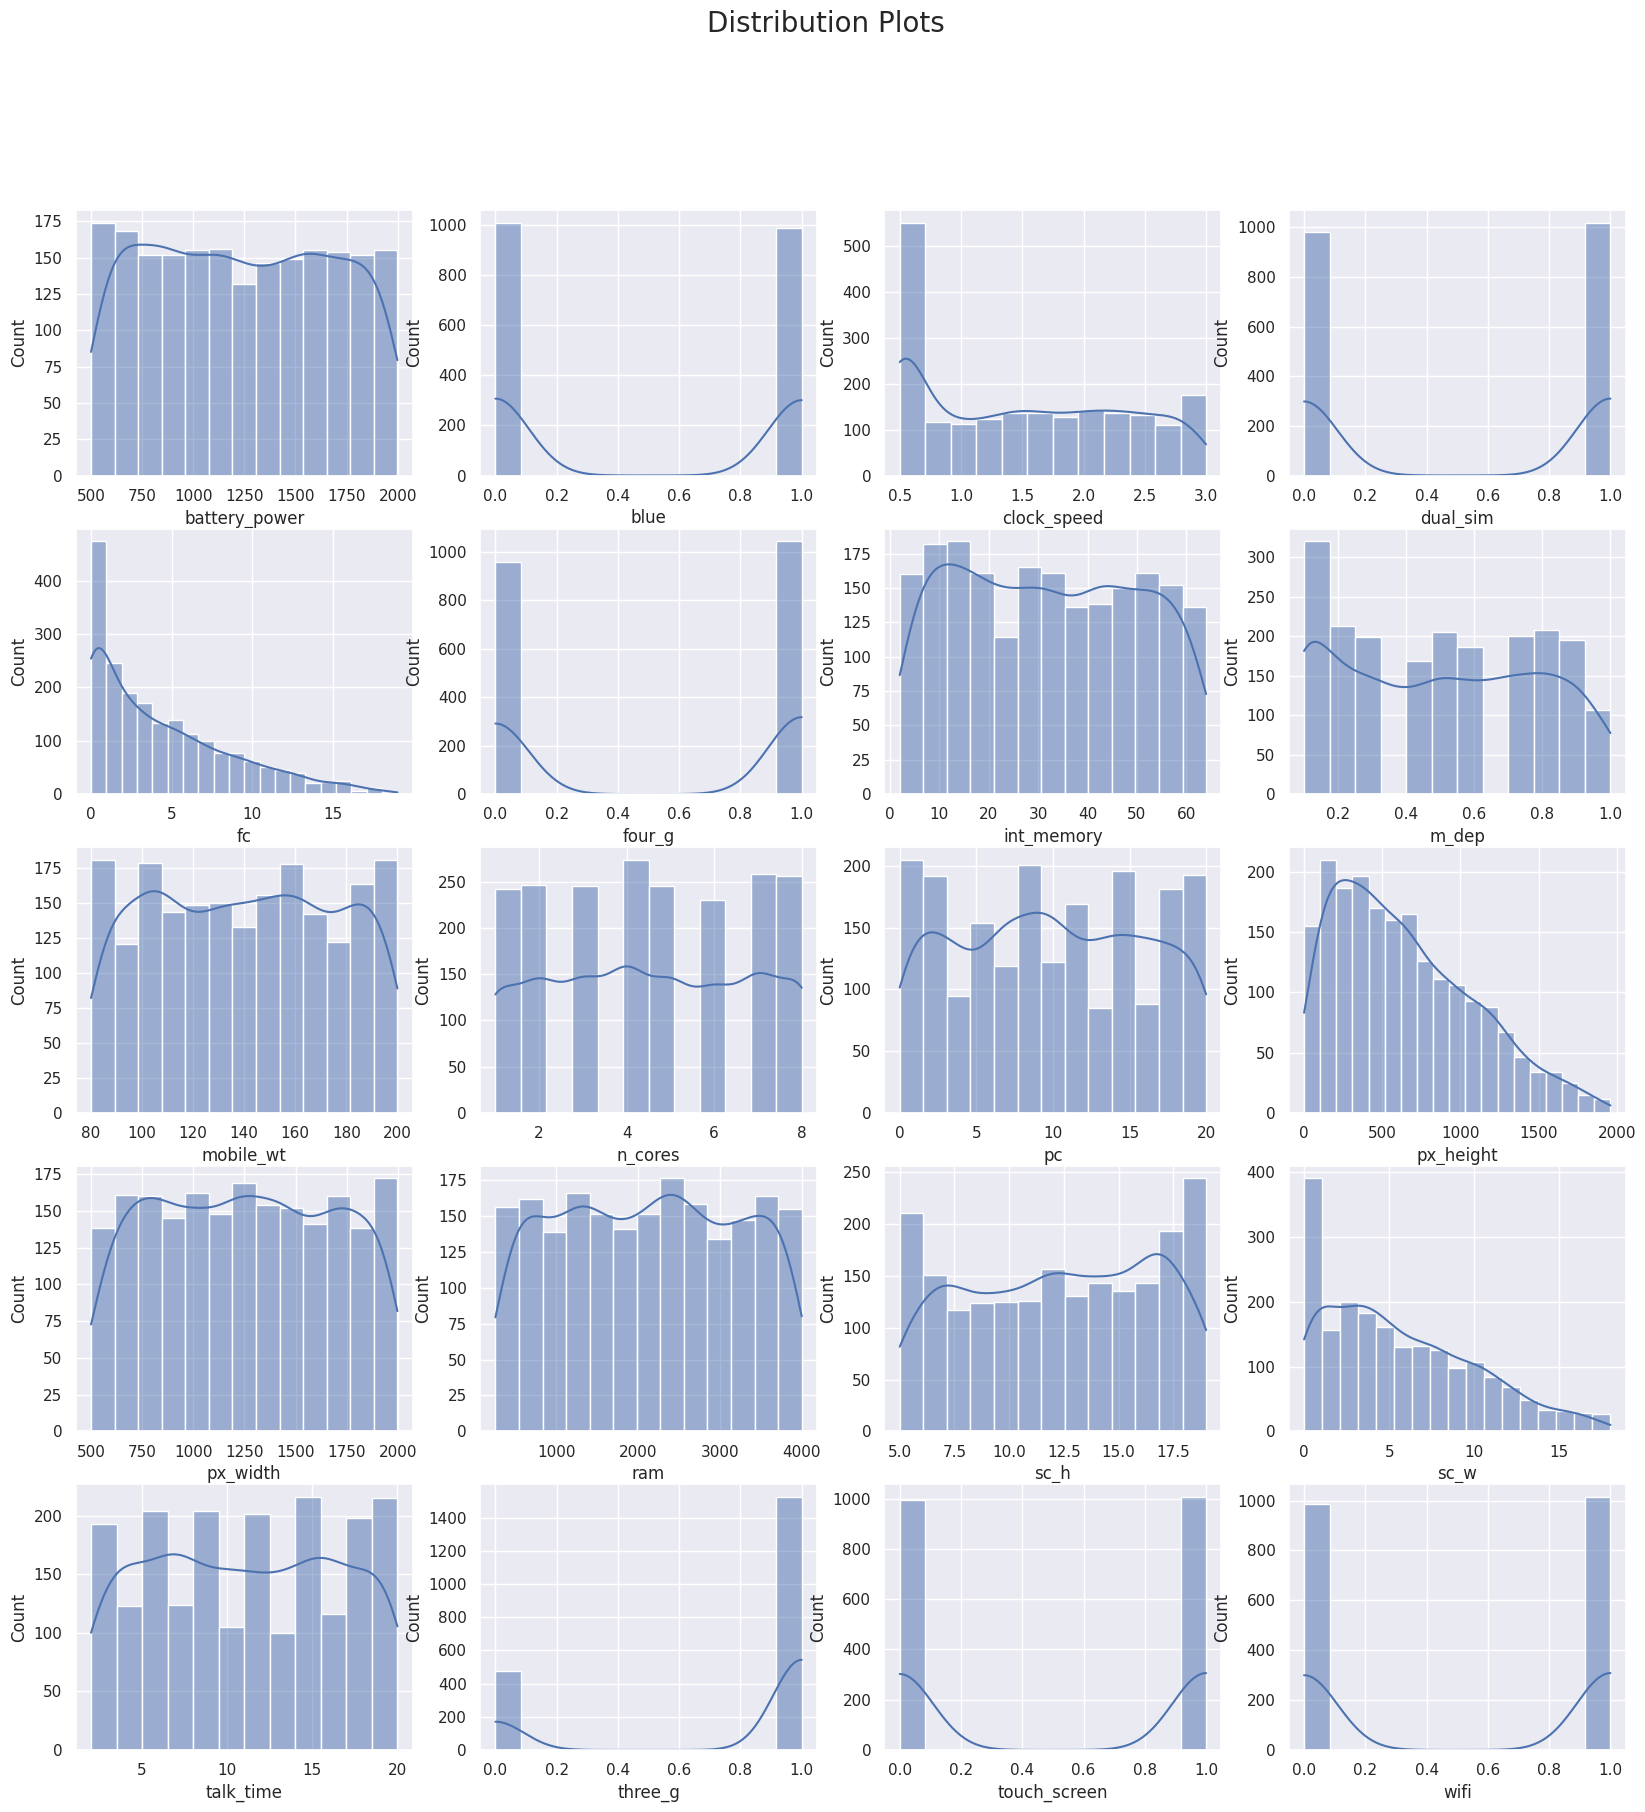

In [ ]:
# 5 by 4 figure of distribution plot
fig, axes = plt.subplots(5, 4, figsize=(20,20))
fig.suptitle('Distribution Plots', fontsize=20)
# For loop
columns = data.columns
for i in range(5):
    for j in range(4):
        sns.histplot(data[columns[i*4 + j]], ax=axes[i, j], kde=True)
plt.show()

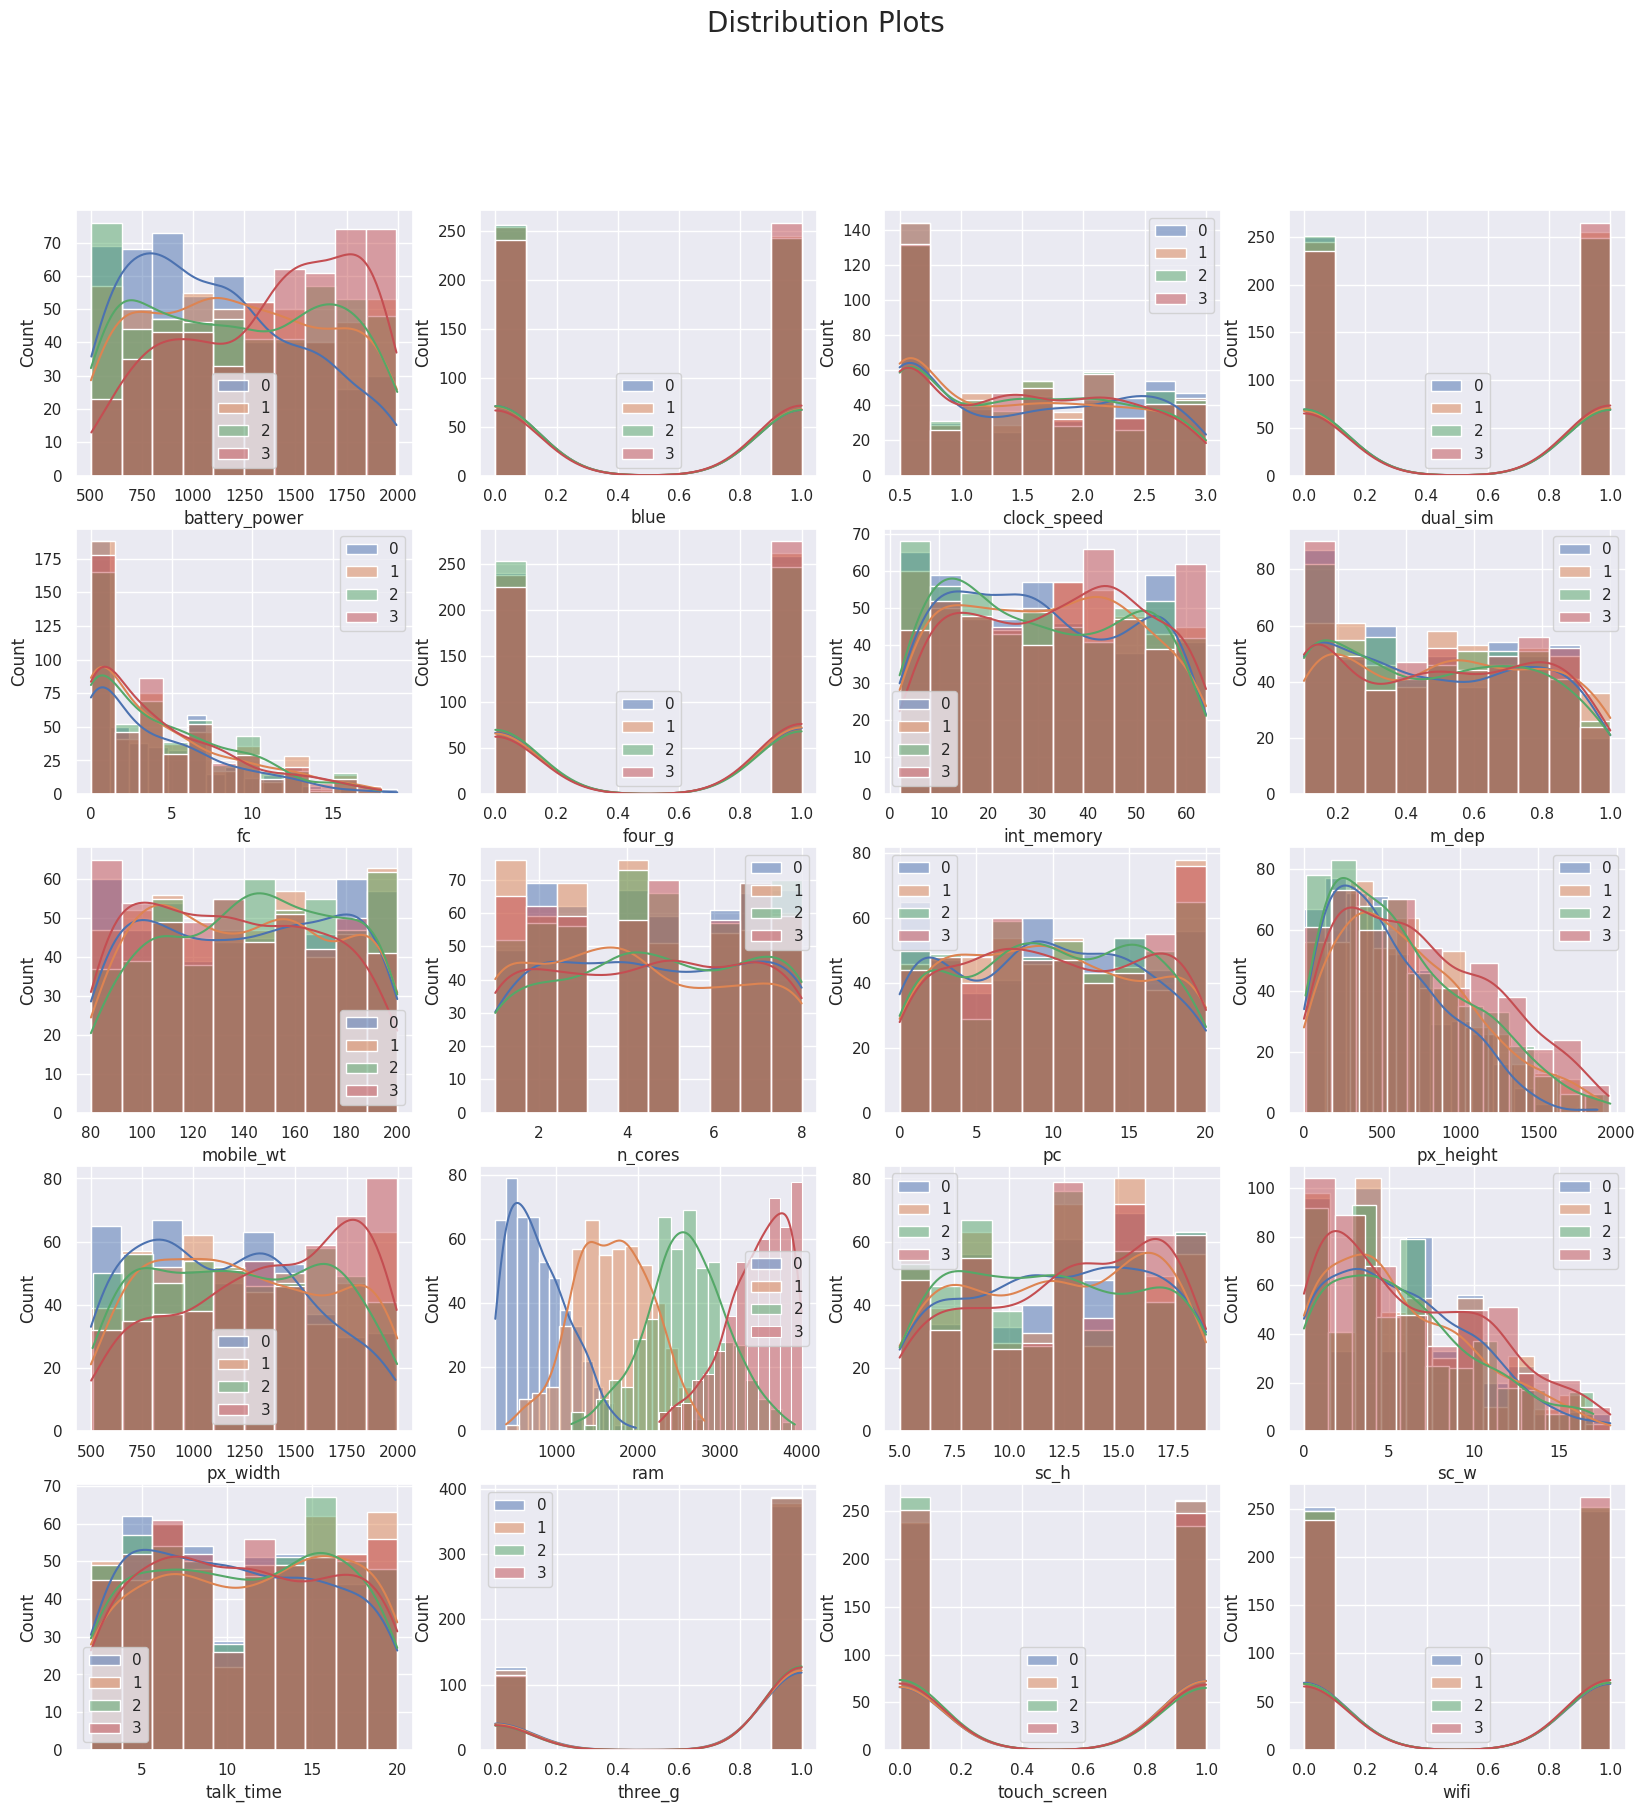

In [ ]:
# 5 by 4 figure of distribution plot
fig, axes = plt.subplots(5, 4, figsize=(20,20))
fig.suptitle('Distribution Plots', fontsize=20)
price_range_group = data.groupby('price_range')
# For loop
columns = data.columns
for i in range(5):
    for j in range(4):
        for name, group in price_range_group:
            sns.histplot(group[columns[i*4 + j]], ax=axes[i, j], kde=True, label=name)
        axes[i, j].legend()
plt.show()

In [ ]:
# fit kmeans model
from sklearn.cluster import KMeans

# prepare data
kmean_data = data.drop('price_range', axis = 1)

# initiate the kmeans model with three clusters
kmeans = KMeans(n_clusters=4)

# fit the model to the data
kmeans.fit(kmean_data)

# create labels from the model
kmean_data ['labels'] = kmeans.labels_

kmean_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,labels
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,2


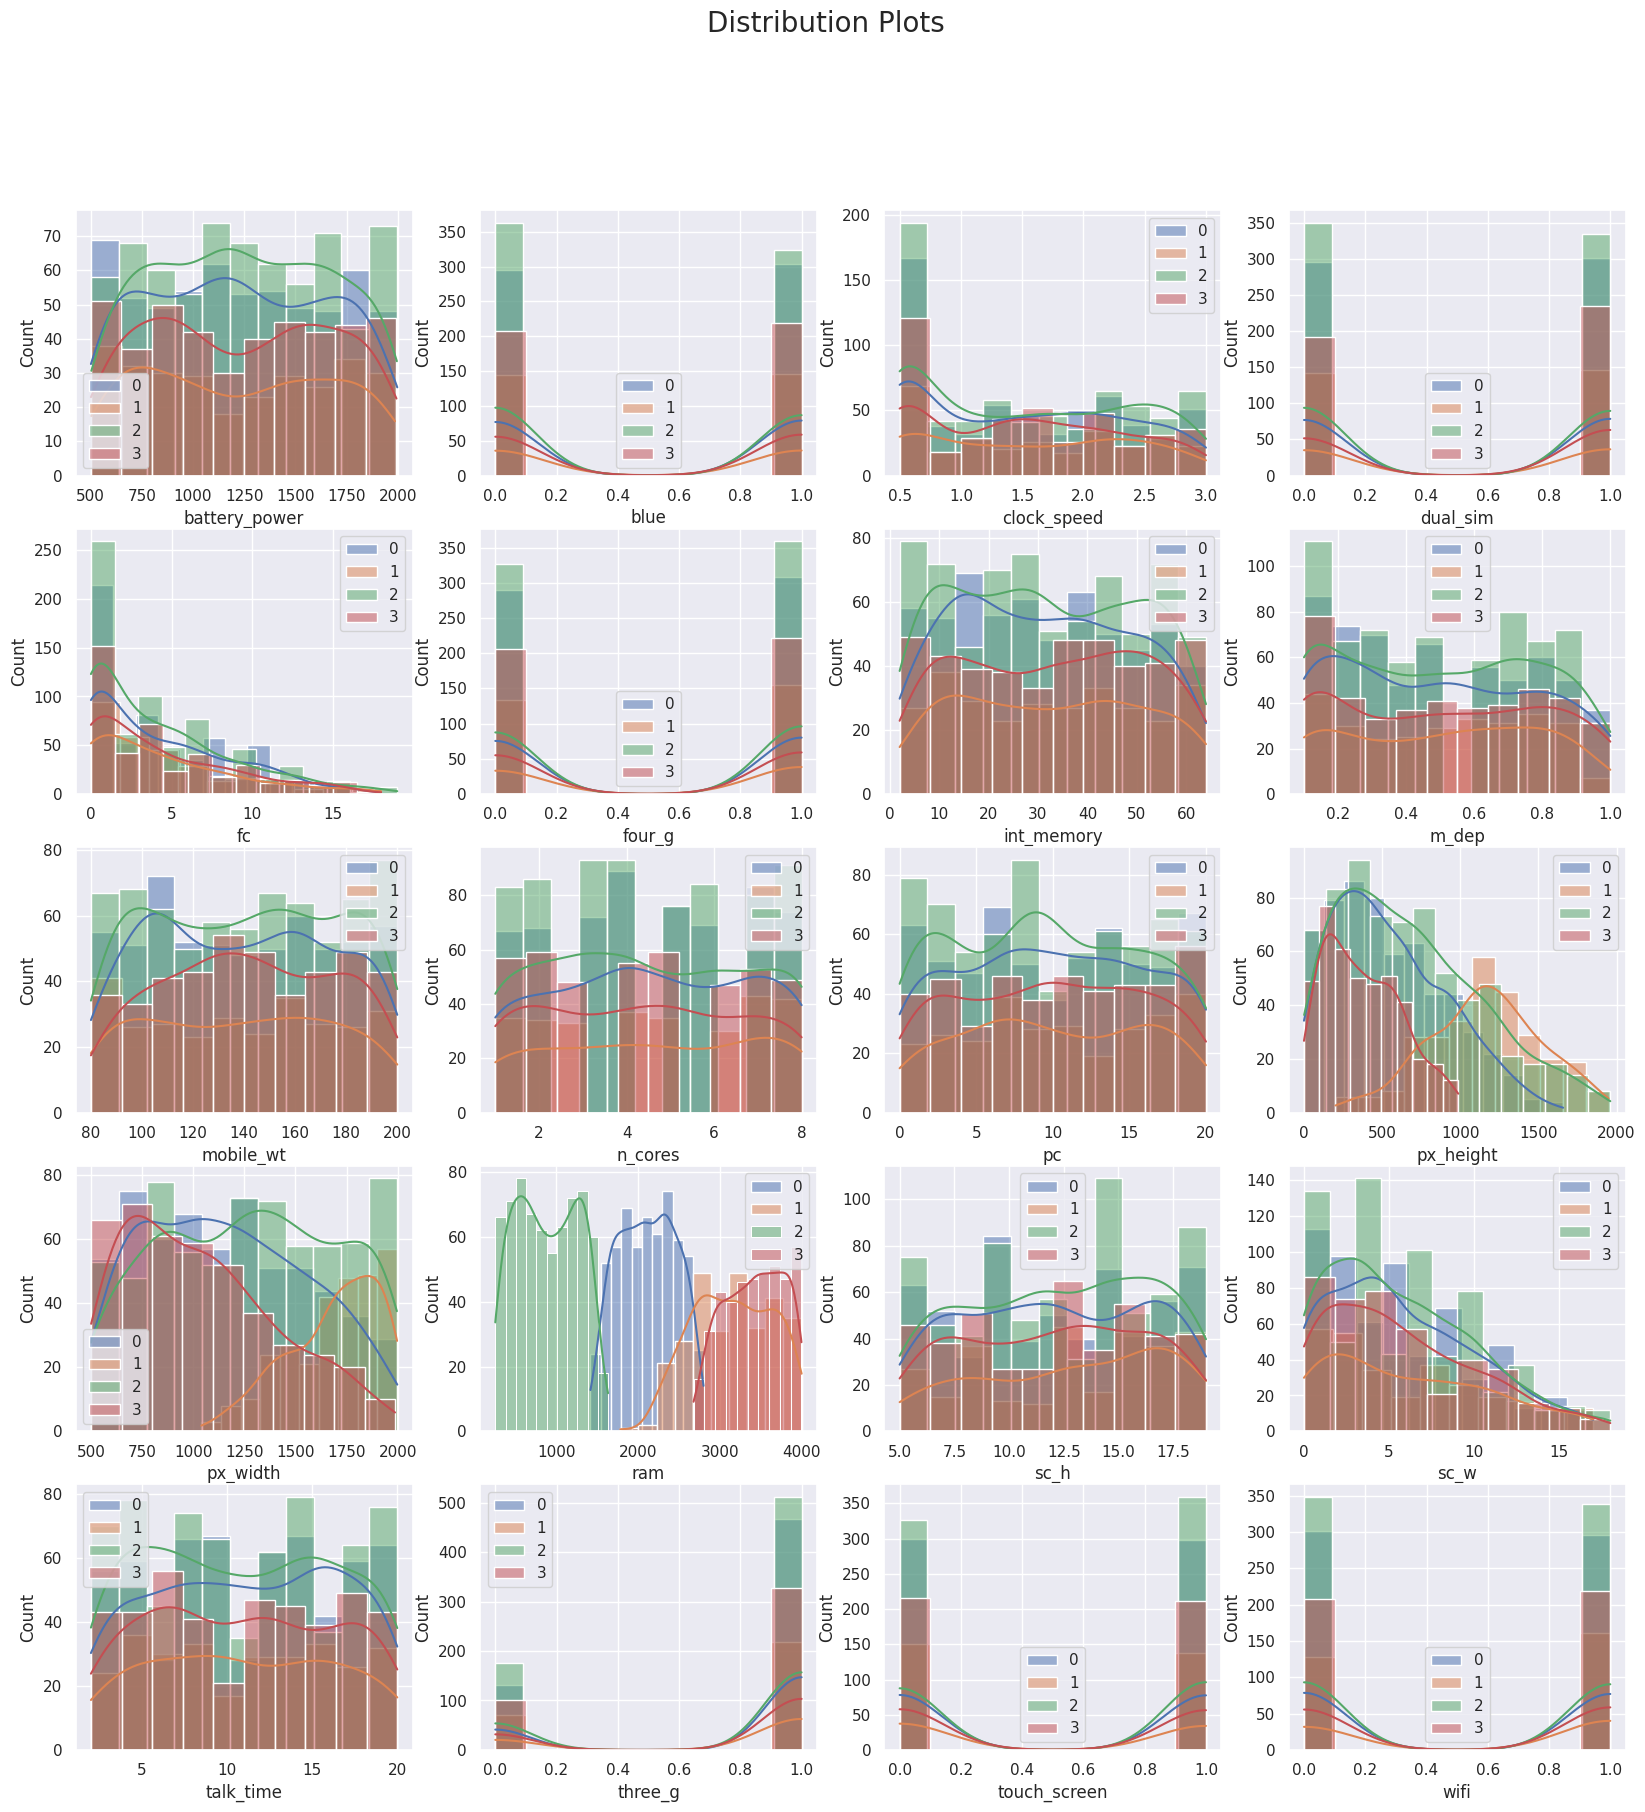

In [ ]:
# 5 by 4 figure of distribution plot
fig, axes = plt.subplots(5, 4, figsize=(20,20))
fig.suptitle('Distribution Plots', fontsize=20)
price_range_group_kmeans = kmean_data.groupby('labels')
# For loop
columns = kmean_data.columns
for i in range(5):
    for j in range(4):
        for name, group in price_range_group_kmeans:
            sns.histplot(group[columns[i*4 + j]], ax=axes[i, j], kde=True, label=name)
        axes[i, j].legend()
plt.show()